Adikari A.A.S.D. \
210022G \
Assignment 03 - Neural Networks

<h2> Task 1 <h2> 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# 2. Define Network Architecture with Hidden Layer
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = self.fc1(x)  # First layer
        x = self.sigmoid(x)  # Sigmoid activation
        x = self.fc2(x)  # Output layer
        return x

# Model parameters
input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
hidden_size = 100  # Hidden layer size
output_size = 10  # Number of classes

# Instantiate model, loss function, and optimizer
model = SimpleNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005) 


In [ ]:
# 3. Training Loop
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()

    # Average loss for the epoch
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 2.0825
Epoch 2/10, Loss: 1.9111
Epoch 3/10, Loss: 1.8474
Epoch 4/10, Loss: 1.8086
Epoch 5/10, Loss: 1.7804
Epoch 6/10, Loss: 1.7585
Epoch 7/10, Loss: 1.7412
Epoch 8/10, Loss: 1.7262
Epoch 9/10, Loss: 1.7134
Epoch 10/10, Loss: 1.7023


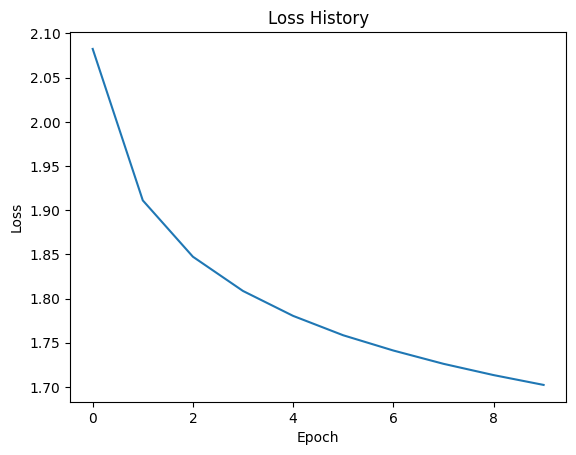

In [4]:
# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [5]:
# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for inputs, labels in trainloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training Accuracy: {train_acc:.2f}%")

Training Accuracy: 41.40%


In [6]:
# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 41.00%


<h4>Discussion<h4>

The model's ability to learn complex patterns is enhanced in this design by the addition of a hidden layer with 100 nodes and a sigmoid activation, which allows it to collect intermediate representations prior to the final classification. Better feature separation is made possible by this additional non-linearity layer, which makes the loss curve smoother and more stable as the model converges more successfully. In contrast to the single-layer network, the new architecture lowers noise in the loss function, suggesting a more reliable and consistent training procedure.

<h2> Task 2 <h2> 

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalization for grayscale images
])
batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


In [15]:
# 2. Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # Input: 1x28x28, Output: 6x24x24
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Input: 6x12x12, Output: 16x8x8
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 16 feature maps of 4x4 size after pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 output classes for digits 0-9

        # Pooling layer
        self.pool = nn.AvgPool2d(2, 2)  # 2x2 average pooling

    def forward(self, x):
        # Pass through convolutional layers with activation and pooling
        x = self.pool(torch.relu(self.conv1(x)))  # Input: 1x28x28, Output: 6x12x12
        x = self.pool(torch.relu(self.conv2(x)))  # Input: 6x12x12, Output: 16x4x4
        
        # Flatten for fully connected layers
        x = x.view(-1, 16 * 4 * 4)  # Flatten to 256 features
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [16]:
# 3. Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero gradients
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader):.4f}")


Epoch 1/10, Loss: 0.2843
Epoch 2/10, Loss: 0.0769
Epoch 3/10, Loss: 0.0544
Epoch 4/10, Loss: 0.0438
Epoch 5/10, Loss: 0.0363
Epoch 6/10, Loss: 0.0322
Epoch 7/10, Loss: 0.0267
Epoch 8/10, Loss: 0.0232
Epoch 9/10, Loss: 0.0215
Epoch 10/10, Loss: 0.0198


In [17]:
# 4. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for inputs, labels in trainloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training Accuracy: {train_acc:.2f}%")

Training Accuracy: 99.61%


<h2> Task 3 <h2> 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 1. Load the Hymenoptera Dataset
data_dir = "data\hymenoptera"

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets and dataloaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

<>:16: SyntaxWarning: invalid escape sequence '\h'
<>:16: SyntaxWarning: invalid escape sequence '\h'
C:\Users\damsi\AppData\Local\Temp\ipykernel_1088\84268902.py:16: SyntaxWarning: invalid escape sequence '\h'
  data_dir = "data\hymenoptera"


In [13]:
# Function to train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model

# Fine-tuning the model
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

print("Fine-tuning the ConvNet")
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

# Feature Extraction
model_conv = models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False  # Freeze all layers

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler_conv = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

print("Using the ConvNet as a fixed feature extractor")
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler_conv, num_epochs=10)

# Report the training and validation accuracies for both methods

Fine-tuning the ConvNet
Epoch 1/10
----------
train Loss: 0.5892 Acc: 0.7295
val Loss: 0.3143 Acc: 0.8889

Epoch 2/10
----------
train Loss: 0.7105 Acc: 0.7541
val Loss: 0.2288 Acc: 0.9020

Epoch 3/10
----------
train Loss: 0.4682 Acc: 0.8238
val Loss: 0.3138 Acc: 0.8627

Epoch 4/10
----------
train Loss: 0.5087 Acc: 0.7828
val Loss: 0.3855 Acc: 0.8693

Epoch 5/10
----------
train Loss: 0.5576 Acc: 0.8197
val Loss: 0.2450 Acc: 0.9150

Epoch 6/10
----------
train Loss: 0.6228 Acc: 0.7459
val Loss: 0.4815 Acc: 0.8301

Epoch 7/10
----------
train Loss: 0.5502 Acc: 0.7910
val Loss: 0.2167 Acc: 0.9346

Epoch 8/10
----------
train Loss: 0.3076 Acc: 0.8525
val Loss: 0.2132 Acc: 0.9477

Epoch 9/10
----------
train Loss: 0.3318 Acc: 0.8730
val Loss: 0.2675 Acc: 0.9150

Epoch 10/10
----------
train Loss: 0.3099 Acc: 0.8770
val Loss: 0.3702 Acc: 0.8693

Training complete in 10m 56s
Best val Acc: 0.9477
Using the ConvNet as a fixed feature extractor
Epoch 1/10
----------
train Loss: 0.7250 Acc: 0.

<h4>Discussion<h4>

<h5> Fine-Tuning <h5>
Fine-tuning involves training all layers of the network, allowing the model to adapt fully to the specific dataset (here, hymenoptera). This approach achieved the highest validation accuracy of 94.77%, as it enables the model to learn intricate patterns specific to ants and bees while leveraging pre-trained weights as a starting point. However, it requires more computational power and time, as all layers undergo updates. Fine-tuning is ideal when the target dataset is similar in size or complexity to the original training set, benefiting from full model flexibility.

<h5> Feature Extraction <h5>
Feature extraction keeps all layers except the final one frozen, using the pre-trained model as a feature extractor and only training the last layer for classification. This method reached a similar best validation accuracy of 94.77%, with less computational demand than fine-tuning. Feature extraction works well when the target dataset is small, as it avoids overfitting by keeping most layers fixed. This technique is effective when the pre-trained features (from ImageNet) are general enough to apply to the new classification task.